<a href="https://colab.research.google.com/github/sipocz/Zindi/blob/main/Zindi_231018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jtext-103/jddb.git


Cloning into 'jddb'...
remote: Enumerating objects: 1910, done.
remote: Counting objects: 100% (1910/1910), done.
remote: Compressing objects: 100% (750/750), done.
remote: Total 1910 (delta 946), reused 1895 (delta 931), pack-reused 0
Receiving objects: 100% (1910/1910), 1.13 MiB | 9.37 MiB/s, done.
Resolving deltas: 100% (946/946), done.


In [2]:
!cd jddb
!pip install ./jddb/code/JDDB/.

Processing ./jddb/code/JDDB
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 7.3 MB/s eta 0:00:00
  Created wheel for jddb: filename=jddb-0.1.0-py3-none-any.whl size=23034 sha256=a894e93495dfce04734118b79411b531720c35d0faf5edaedc234ca5811886b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-c3qp5vgd/wheels/1a/de/3e/3b0a090f3e1057f34afb37e06d54aa9a9d2c95885632227c26
Successfully built jddb


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)




Mounted at /content/gdrive


In [4]:
root_dir = "/content/gdrive/My Drive/zindi"

In [5]:
fname="/content/gdrive/MyDrive/zindi/HL-2A_Data.rar"

In [6]:
!mkdir data

In [7]:
!cp $fname ./data

In [8]:
!unrar x $fname -d data


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/gdrive/MyDrive/zindi/HL-2A_Data.rar

Creating    data/JDDB_repo_2A_5k                                      OK
Extracting  data/JDDB_repo_2A_5k/35956.hdf5                                0%  OK 
Extracting  data/JDDB_repo_2A_5k/35957.hdf5                                0%  OK 
Extracting  data/JDDB_repo_2A_5k/35958.hdf5                                0%  OK 
Extracting  data/JDDB_repo_2A_5k/35959.hdf5                                0%  OK 
Extracting  data/JDDB_repo_2A_5k/35960.hdf5                                0%  OK 
Extracting  data/JDDB_repo_2A_5k/35961.hdf5                                0%  OK 
Extracting  data/JDDB_repo_2A_5k/35962.hdf5                                0%  OK 
Extracting  data/JDDB_repo_2A_5k/35963.hdf5                                0%  OK 
Extracting  data/JDDB_repo_2A_5k/35964.hdf5          

In [9]:
import os

dataset_path = './data/JDDB_repo_2A_5k'
file_list = os.listdir(dataset_path)
print(file_list[:5])

['36628.hdf5', '36933.hdf5', '36020.hdf5', '36664.hdf5', '36937.hdf5']


{'DS-SXR-SXA:SX18', 'CCO-LFB:LFEX-IP', 'DS-EMD-MP:MPOL-04', 'DS-BM-AB:BOLD04', 'DS-BM-AB:BOLD15', 'DS-EMD-MP:NPOL-07', 'CCO-LFB:LFBMP2', 'CCO-DF:DENSITY1', 'CCO-LFB:LFDH', 'DS-EMD-MP:MPOL-08', 'DS-SXR-SXA:SX10', 'DS-SXR-SXA:SX02', 'DS-EMD-MP:MPOL-17', 'DS-SXR-SXA:SX04', 'DS-SXR-SXA:SX06', 'DS-EMD-MP:MPOL-11', 'RadiatedFraction', 'DS-SXR-SXA:SX01', 'DS-EMD-MP:MPOL-18', 'CCO-LFB:LFBBV', 'DS-EMD-MP:MPOL-06', 'DS-FIR:FIR-SPH4A', 'DS-BM-AB:BOLD07', 'DS-EMD-MP:MPOL-12', 'DS-SXR-SXA:SX07', 'DS-EMD-MP:MPOL-16', 'DS-EMD-MP:NPOL-02', 'DS-SXR-SXA:SX13', 'DS-SXR-SXA:SX03', 'DS-EMD-MP:NPOL-03', 'DS-EMD-MP:MPOL-15', 'DS-BM-AB:BOLD03', 'DS-EMD-ROG:VL-FILTER', 'DS-BM-AB:BOLD11', 'DS-EMD-MP:NPOL-10', 'DS-BM-AB:BOLD02', 'DS-BM-AB:BOLD13', 'DS-BM-AB:BOLD01', 'EFIT_q95', 'DS-SXR-SXA:SX12', 'DS-EMD-MP:NPOL-06', 'DS-SXR-SXA:SX15', 'DS-EMD-MP:MPOL-07', 'CCO-LFB:LFBMP1', 'DS-EMD-MP:MPOL-09', 'GW_Ratio', 'DS-BM-AB:BOLD08', 'DS-BM-AB:BOLD06', 'DS-EMD-MP:NPOL-09', 'DS-BM-AB:BOLD16', 'DS-EMD-MP:MPOL-02', 'Ip_Erro

Text(0.5, 0, 'Time(s)')

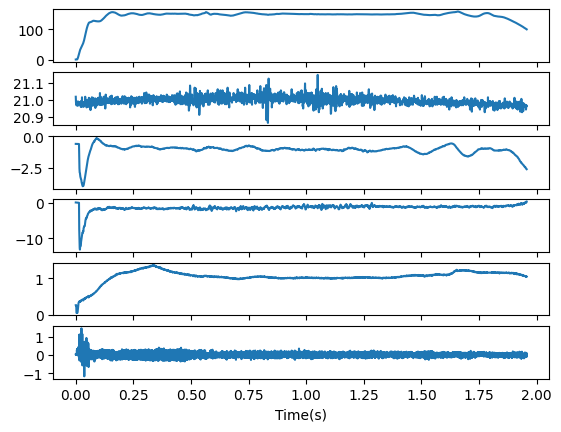

In [10]:
from jddb.file_repo import FileRepo
from jddb.processor import Shot
import numpy as np
import matplotlib.pyplot as plt

# load file repo
file_repo = FileRepo(dataset_path)

# select a shot id in the file repo, see which signals are given in this shot
shot_list = file_repo.get_all_shots()
shot_id = shot_list[169]
example_shot = Shot(shot_id, file_repo)
print(example_shot.tags)

# plot some basic plasma parameters
# CCO-LFB:LFEX-IP     |      plasma current(kA)
# CCO-LFB:LFBBT       |      current in toroidal magnetic field coild(kA), can be conveted into field intensity by timing 0.0622T/kA
# CCO-LFB:LFDH        |      horizontal displacement of plasma (i.e.)
# CCO-LFB:LFDV        |      vertical displacement of plasma (i.e.)
# CO-DF:DENSITY1      |      plasma density(10e19/m^3)
# DS-EMD-MP:MPOL-04     |      magnetic perturbation measured by Mirnov porbe
plot_tags = ["CCO-LFB:LFEX-IP", "CCO-LFB:LFBBT", "CCO-LFB:LFDH", "CCO-LFB:LFDV", "CCO-DF:DENSITY1", "DS-EMD-MP:MPOL-04"]
f, axs = plt.subplots(nrows=6, ncols=1, sharex=True)
axs = np.reshape(axs, -1)
for i, tag in enumerate(plot_tags):
    if example_shot.labels[tag] == 1:
        data = example_shot.get_signal(tag)
        axs[i].plot(data.time, data.data)
axs[i].set_xlabel('Time(s)')

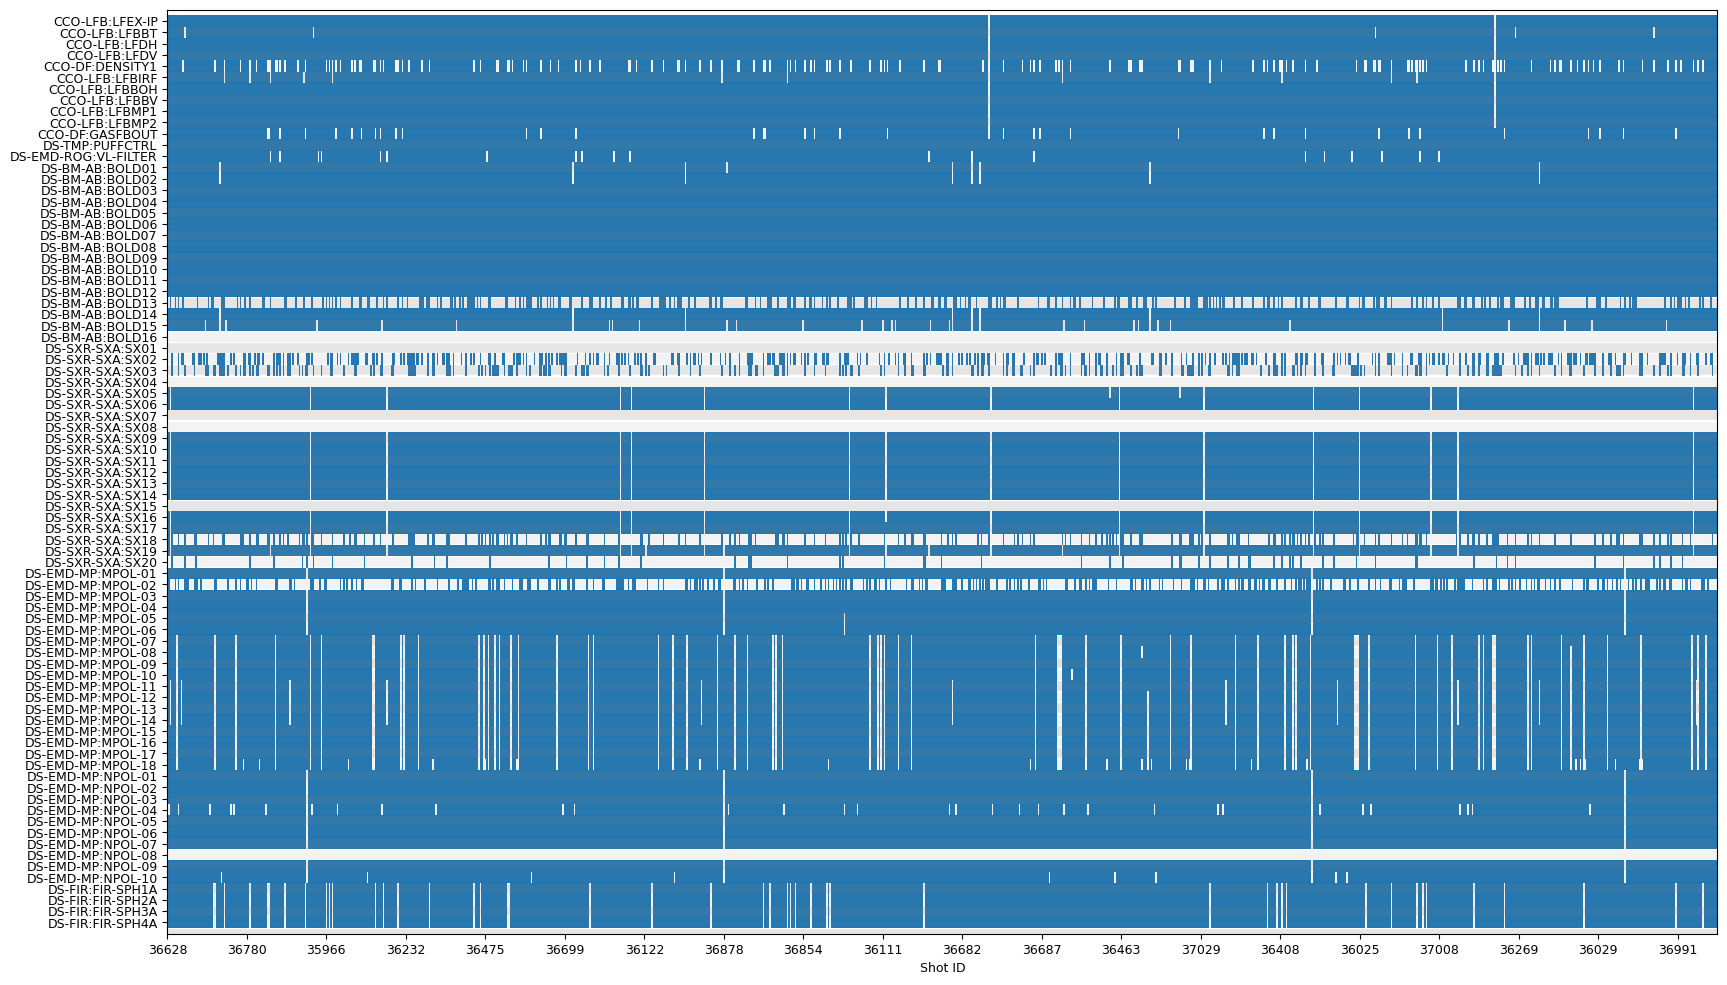

In [11]:
# set a tag list to check health
tags = ["CCO-LFB:LFEX-IP", "CCO-LFB:LFBBT", "CCO-LFB:LFDH", "CCO-LFB:LFDV", "CCO-DF:DENSITY1", "CCO-LFB:LFBIRF",
        "CCO-LFB:LFBBOH", "CCO-LFB:LFBBV", "CCO-LFB:LFBMP1", "CCO-LFB:LFBMP2", "CCO-DF:GASFBOUT", "DS-TMP:PUFFCTRL",
        "DS-EMD-ROG:VL-FILTER"]
tags += ["DS-BM-AB:BOLD%02d" % channel_id for channel_id in range(1, 17)]
tags += ["DS-SXR-SXA:SX%02d" % channel_id for channel_id in range(1, 21)]
tags += ["DS-EMD-MP:MPOL-%02d" % channel_id for channel_id in range(1, 19)]
tags += ["DS-EMD-MP:NPOL-%02d" % channel_id for channel_id in range(1, 11)]
tags += ["DS-FIR:FIR-SPH%1dA" % channel_id for channel_id in range(1, 5)]

# collect the validity flag of each tag for each shot in to an aray
valid_array = np.zeros([len(tags), len(shot_list)])
for i, shot_id in enumerate(shot_list):
    shot_tags = file_repo.get_tag_list(shot_id)
    shot_labels = file_repo.read_labels(shot_id)
    for j, tag in enumerate(tags):
        if tag in shot_labels:
            valid_array[j, i] = shot_labels[tag]

# plot the data health figure
font = {'family': 'Arial',
        'size': '9'}
plt.rc('font', **font)
f = plt.figure(figsize=[20, 12])
ax = f.add_subplot(111)
for i, tag in enumerate(tags):
    for j, shot_id in enumerate(shot_list):
        if valid_array[i, j] == 1:
            rect = plt.Rectangle((j-0.5, len(tags)-i-1.5), 1, 1)
            ax.add_patch(rect)
ax.set_xlabel("Shot ID")
ax.set_xlim([0, len(shot_list)])
ax.set_xticks(np.arange(0, len(shot_list), 50))
ax.set_xticklabels(np.array(shot_list)[np.arange(0, len(shot_list), 50)])
ax.set_ylim([-1, len(tags)])
ax.set_yticks(np.arange(len(tags)))
ax.set_yticklabels(tags[::-1])
for i in range(-1, len(tags)):
    ax.plot(ax.get_xlim(), [i, i], color='gray', linewidth=7, alpha=(np.mod(i, 2)+1)*0.1)